In [6]:
####################
## load libraries ##
####################
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#######################
## guassian function ##
#######################
def normal_function(x, mu, variance):
    f_y = (1/math.sqrt(2*math.pi*variance))*np.exp(-(1/2)*((x-mu)**2)/variance)
    return(f_y)

##########################################################################################
## function to specify simulated dataset with guassian mixture as posterior of interest ##
##########################################################################################
def simulate_dataset():
    df = pd.DataFrame()
    df['x'] = np.linspace(-40, 40, 1000)
    df['y1'] = normal_function(df['x'], mu=0, variance=1)
    df['y2'] = normal_function(df['x'], mu=-5, variance=4)
    df['y3'] = normal_function(df['x'], mu=8, variance=10)
    df['y4'] = ((1/3)*df['y1']) + ((1/3)*df['y2']) + ((1/3)*df['y3'])
    df['k(x)'] = (df['y1']) + (df['y2']) + (df['y3'])
    
    plt.plot(df['x'], df['y4'])
    plt.title('Posterior Distribution - Gaussian Mixture')
    
    return(df)

In [8]:
################################################
## function for Acceptance/Rejection Sampling ##
################################################
def Accept_Reject_Sampling(df):
    M = 10
    df['q * M'] = M * normal_function(df['x'], mu=0, variance=40)
    df['below_flag'] = 0
    df.loc[df['q * M']<df['k(x)'], 'below_flag'] = 1
    df['below_flag'].sum()
    
    n = 100000
    ## specify proposal q~N(0,40) with M=3
    df_sample = pd.DataFrame()
    df_sample['x'] = np.random.normal(loc=0, scale=math.sqrt(40), size=n)
    df_sample['k(x)'] = (normal_function(df_sample['x'], mu=0, variance=1)) + (normal_function(df_sample['x'], mu=-5, variance=4)) + (normal_function(df_sample['x'], mu=8, variance=10))
    df_sample['M*q(x)'] = M * normal_function(df_sample['x'], mu=0, variance=40)
    df_sample['P(A|x)'] = df_sample['k(x)'] / df_sample['M*q(x)']
    df_sample['uniform random sample'] = np.random.uniform(0, 1, size=df_sample.shape[0])
    df_sample['keep'] = 0
    df_sample.loc[df_sample['uniform random sample'] < df_sample['P(A|x)'], 'keep'] = 1
    df_keep = df_sample.loc[df_sample['keep']==1, :].reset_index(drop=True)
    
    plt.hist(df_keep['x'], bins=100, density=True)
    plt.title('Acceptance/Rejection Sampling')

In [9]:
###########################################
## function for MCMC Metropolis-Hastings ##
###########################################
def Metropolis_Hastings(df):
    n = 100000
    samples = []
    samples.append(np.random.normal(loc=0, scale=math.sqrt(20), size=1)[0])
    for i in range(0, n):
        
        x_curr = samples[-1]
        x_new = np.random.normal(loc=x_curr, scale=math.sqrt(20), size=1)[0]
        
        k_curr = (normal_function(x_curr, mu=0, variance=1)) + (normal_function(x_curr, mu=-5, variance=4)) + (normal_function(x_curr, mu=8, variance=10))
        k_new = (normal_function(x_new, mu=0, variance=1)) + (normal_function(x_new, mu=-5, variance=4)) + (normal_function(x_new, mu=8, variance=10))
        
        q_curr = normal_function(x_curr, mu=x_new, variance=20)
        q_new = normal_function(x_new, mu=x_curr, variance=20)
        
        ratio = (k_new * q_curr) / (k_curr * q_new)
        
        rand_uniform_sample = np.random.uniform(0, 1, 1)[0]
        
        if(rand_uniform_sample <= ratio):
            samples.append(x_new)
        else:
            samples.append(x_curr)
        
        del x_curr, x_new, k_curr, k_new, q_curr, q_new, ratio, rand_uniform_sample
    
    plt.hist(samples, bins=100, density=True)
    plt.title('MCMC Metropolis-Hastings')

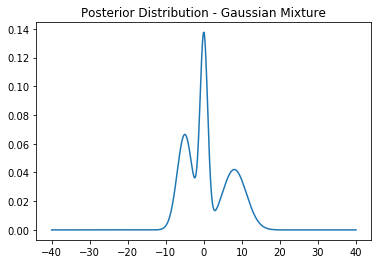

In [10]:
## return and print simulated dataset:
df = simulate_dataset()

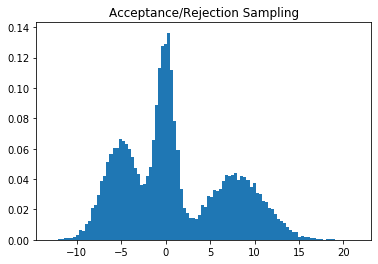

In [11]:
## Acceptance/Rejection Sampling
Accept_Reject_Sampling(df)

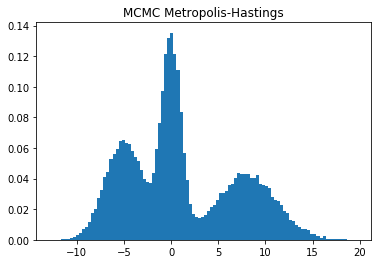

In [12]:
## MCMC Metropolis-Hastings Sampling
Metropolis_Hastings(df)